In [3]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Parsing the Kaggle Corpus

Kaggle provides a Json file containing the meta-data associated with all of the papers hosted on Arxiv.

Reparsing the Json file is a relatively slow process, do **not** run the following code unless you want to reparse it (for example, to add more data from the file to the resulting DataFrame or to update the papers list). Otherwise, just read the `papers.csv` file.

In [4]:
# due to some limitations of Python, the entire JSON file cannot be opened so we will parse it line by line
def get_metadata():
    with open(data_file, 'r') as f:
        for line in f:
            yield line

**Warning!** In order to keep the repository at a reasonable size, the original Kaggle dataset is not included. If you wish to run this block, you need to [download](https://www.kaggle.com/datasets/Cornell-University/arxiv) it.

In [4]:
# lists for all of the information we will retain from the JSON
title = []
pid = []
vers = []
vers_cnt = []
authors_cnt = []
cats = []
vers_date = []

data_file = 'arxiv-metadata-oai-snapshot.json'
metadata = get_metadata()
for paper in metadata:
    js = json.loads(paper)
    vs = js.get('versions')
    # only add a paper if it has 2, 3 or 4 versions
    #if len(vs) > 1 and len(vs) < 5:
    if len(vs) > 1:
        # add each version of the paper as a separate entry in the DataFrame
        for i in range(len(vs)):
            title.append(js.get('title'))
            pid.append(js.get('id'))
            vers.append(i + 1)
            vers_cnt.append(len(vs))
            authors_cnt.append(len(js.get('authors_parsed')))
            cats.append(js.get('categories'))
            vers_date.append(js.get('versions')[i].get('created'))

In [5]:
# build a DataFrame from the extracted information
papers = pd.DataFrame({
    'title': title,
    'id': pid,
    'categories': cats,
    'version': vers,
    'total_versions': vers_cnt,
    'date': vers_date,
    'authors_cnt': authors_cnt,
})

In [6]:
papers.authors_cnt.argmax()

582140

In [7]:
papers.iloc[582140]

title             Observation of the rare $B^0_s\to\mu^+\mu^-$ d...
id                                                        1411.4413
categories                                            hep-ex hep-ph
version                                                           1
total_versions                                                    2
date                                  Mon, 17 Nov 2014 10:10:25 GMT
authors_cnt                                                    2832
Name: 582140, dtype: object

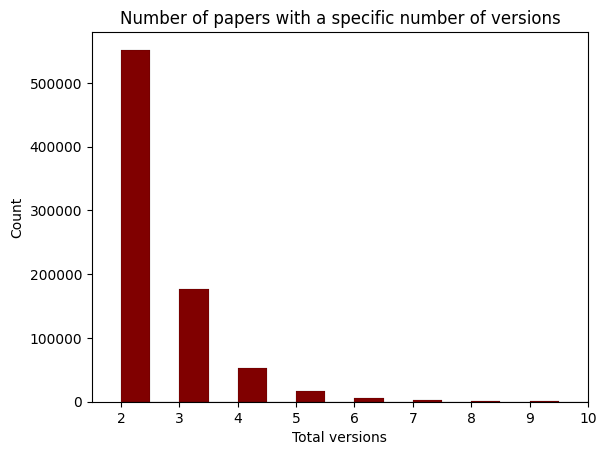

In [21]:
sns.histplot(data=papers.drop_duplicates('id'), x="total_versions", binwidth=0.5, color='maroon', alpha=1)
plt.xlim([1.5, 10])

plt.title('Number of papers with a specific number of versions')
plt.xlabel('Total versions')
plt.ylabel('Count')

plt.show()

In [15]:
# parse the dates as dates
papers['date'] = pd.to_datetime(papers['date'])

In [16]:
# save the DataFrame as a CSV file for future reference
papers.to_csv('papers_all_vers.csv', index=False)

# Splitting the DataFrame based on category

In [2]:
papers = pd.read_csv('papers.csv', parse_dates = ['date'], dtype = {'title': str, 'id': str, 'categories': str, 'version': int, 'total_version': int})

In [3]:
papers.drop_duplicates('id').count()

title             780771
id                780771
categories        780771
version           780771
total_versions    780771
date              780771
dtype: int64

In [8]:
papers.head()

,title,id,categories,version,total_versions,date
0,Calculation of prompt diphoton production cros...,0704.0001,hep-ph,1,2,2007-04-02 19:18:42+00:00
1,Calculation of prompt diphoton production cros...,0704.0001,hep-ph,2,2,2007-07-24 20:10:27+00:00
2,Sparsity-certifying Graph Decompositions,0704.0002,math.CO cs.CG,1,2,2007-03-31 02:26:18+00:00
3,Sparsity-certifying Graph Decompositions,0704.0002,math.CO cs.CG,2,2,2008-12-13 17:26:00+00:00
4,The evolution of the Earth-Moon system based o...,0704.0003,physics.gen-ph,1,3,2007-04-01 20:46:54+00:00


In [9]:
# open Json file with categories
categories_path = 'categories.json'
f = open(categories_path)
categories = json.load(f)

In [10]:
# given a series of subcategories as a string (e.g. "math.CO cs.CG hep-ph"), check if any of the subcategories are part of Mathematics
def is_math(x):
    for self_cat in x.split():
        for subcat in categories['mathematics']:
            if subcat == self_cat:
                return True
    return False

In [11]:
# given a series of subcategories as a string (e.g. "math.CO cs.CG hep-ph"), check if any of the subcategories are part of Computer Science
def is_cs(x):
    for self_cat in x.split():
        for subcat in categories['computer science']:
            if subcat == self_cat:
                return True
    return False

In [12]:
# given a series of subcategories as a string (e.g. "math.CO cs.CG hep-ph"), check if any of the subcategories are part of Physics
def is_phys(x):
    for self_cat in x.split():
        for subcat in categories['physics']:
            if subcat == self_cat:
                return True
    return False

Filter for papers based on category:

In [74]:
math_papers = papers.loc[papers['categories'].apply(is_math)].reset_index(drop=True)

In [75]:
cs_papers = papers.loc[papers['categories'].apply(is_cs)].reset_index(drop=True)

In [13]:
phys_papers = papers.loc[papers['categories'].apply(is_phys)].reset_index(drop=True)

Save papers based on category:

Save papers based on category:

In [76]:
math_papers.to_csv('math_papers.csv', index=False)

In [77]:
cs_papers.to_csv('cs_papers.csv', index=False)

In [14]:
phys_papers.to_csv('phys_papers.csv', index=False)